# **Markov Chains are an excellent way to do it**

## **Introduction**

The idea that is behind the Markov Chains is simple: _"everything that will happen in the future only depends on what is happening right now."_ In mathematical terms, we say that there is a sequence of stochastic variables $x_0$, $x_1$, …, $x_n$ that can take values in a certain set A. Then we say that, if the sequence of an event is a Markov Chain, we have:

$$P(x_n = a_n|x_n-1 = a_n-1, x_n-1 = a_n-1, ..., x_0 = a_0) = P(x_n=a_n|x_n-1=a_n-1)$$

And it may sound complicated but it is nothing more than the concept expressed above.
<br>
Another assumption that is made is that the equation is valid for every step (not only the last one), and that the probability is always the same (even though, formally, this is true only for _homogeneous Markov chains_).
<br>
Now, the set of possible states A is usually indicated as the sample space S, and you can describe the probability of going from a state x in S to a state y in S with the so called **transition probability**.

In [1]:
# import all packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use("ggplot")
plt.rcParams["font.family"] = "sans-serif" 
plt.rcParams["font.serif"] = "Ubuntu" 
plt.rcParams["font.monospace"] = "Ubuntu Mono" 
plt.rcParams["font.size"] = 14 
plt.rcParams["axes.labelsize"] = 12 
plt.rcParams["axes.labelweight"] = "bold" 
plt.rcParams["axes.titlesize"] = 12 
plt.rcParams["xtick.labelsize"] = 12 
plt.rcParams["ytick.labelsize"] = 12 
plt.rcParams["legend.fontsize"] = 12 
plt.rcParams["figure.titlesize"] = 12 
plt.rcParams["image.cmap"] = "jet" 
plt.rcParams["image.interpolation"] = "none" 
plt.rcParams["figure.figsize"] = (12, 10) 
plt.rcParams["axes.grid"]=False
plt.rcParams["lines.linewidth"] = 2 
plt.rcParams["lines.markersize"] = 8
colors = ["xkcd:pale orange",
          "xkcd:sea blue", 
          "xkcd:pale red", 
          "xkcd:sage green", 
          "xkcd:terra cotta", 
          "xkcd:dull purple", 
          "xkcd:teal", 
          "xkcd: goldenrod", 
          "xkcd:cadet blue",
          "xkcd:scarlet"]

## **Case 1: Simple Random Walks**

From image below, assume that the first state is $0$, then you jump from $0$ to $1$ with probability $0.5$ and jump from $0$ to $-1$ with probability $0.5$. Then, you do the same thing with $x_1$, $x_2$, $...$, $x_n$. Hence, consider $S(n)$ to be the state at time $n$.
<br>
By a _Markov chain_, it is possible to prove that the probability of being in a certain state, i.e. an integer number $x$, at time $t+1$ only depends on the state at time $t$. 

![Random Walks](https://miro.medium.com/max/402/1*23JFOeEx5rtPOL-NbHENnw.png)

In [2]:
start = 0
x = []
n = 10000
for i in range(n):
    step = np.random.choice([-1,1],p=[0.5,0.5])
    start = start + step
    x.append(start)

Text(0, 0.5, '$S(n)$')

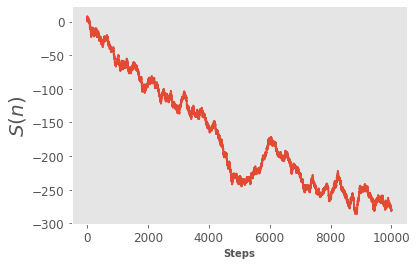

In [3]:
plt.plot(x)
plt.xlabel('Steps',fontsize=10)
plt.ylabel(r'$S(n)$',fontsize=20)

## **Case 2: Gambler's Ruin Chain**

Conceptually, it is very similar to the random walk: you start from a state $x$ and you can go to a state $y=x+1$ with probability $p$ or to a state $y=x-1$ with probability $1-p$.

![Gambler's Ruin Chain](https://miro.medium.com/max/700/1*ciBoAIjKiDm0nAoyLu_xDA.png)

The interesting part is that when you arrive at $1$ or $N$, you are basically stuck. You can do nothing more than stay in that state forever. Hence, assume that $p=0.5$ we can calculate several following condition, such as

### Question 1: Let's say we start from state 3. What is the probability of ending up in state 5 after 2 steps?

The answer is follow

$p^{(2)}(3,5)=p(3,4) p(4,5)=p^{2}$

In this case, it would be $p^{2}=0.5^{2}=0.25$

### Question 2: Let's say we start from state 3. What is the probability of ending up in state 1 after 2 steps?

Again, this is just the probability of going from state 3 to state 2 and then going from state 2 to state 1, as follow

$p^{(2)}(3,1)=p(3,2) p(2,1)=(1-p)^{2}$

Hence, it would be $(1-p)^{2}=(1-0.5)^{2}=0.25$

Also, it could be calculated with another way, as follow

$p^{(2)}(3,3)=1-p^{(2)}(3,1)-p^{(2)}(3,5)=-2p^{(2)}+2p=-2*0.5^{(2)}+2*0.5=0.5$

### Python Application for Infinite Times Repeated

In [4]:
def gamblersruinchain(start,first,last,n):
    for k in range(n):
        if start==first or start==last:
            start = start
        else:
            step = np.random.choice([-1,1],p=[0.5,0.5])
            start = start + step
    return start

This function, given:
* a **starting point**, `start` (e.g. $3$)
* the **first possible value**, `first` (e.g. $0$)
* **the last possible value**, `last` (e.g. $5$)

If we repeat an experiment infinite time, say $n=100000$, we should be able to verify the occurrences suggested by the probability values.

Text(0, 0.5, 'Normalized Count')

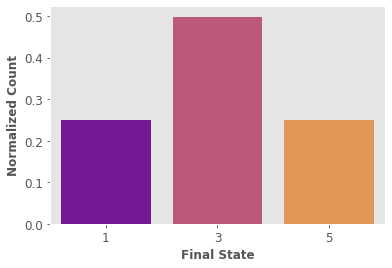

In [5]:
state_list = []
for i in range(100000):
    state_list.append(gamblersruinchain(3,0,5,2))
data_state = pd.DataFrame({'Final State':state_list})
data_occ = pd.DataFrame(data_state.value_counts('Final State')).rename(columns={0:'Count'})
data_occ['Count'] = data_occ['Count']/100000
sns.barplot(x=data_occ.index,y=data_occ['Count'],palette='plasma')
plt.ylabel('Normalized Count')

## **Case 3: Graphical Markov Chain**

![Custom Markov Chain](https://miro.medium.com/max/700/1*xnPUZVTCyGf8kdZdiHN9KQ.png)

When there is an arrow between two nodes (let's say $A$ and $B$), it means that we can go from node $A$ to node $B$ with a certain probability, for example: it is possible to go from state $A$ to state $B$ with probability $0.5$.
<br>
Also, the above model could be summarize as **Markov matrix / transition matrix** as

In [6]:
state_1 = [0.2,0.5,0.3,0,0]
state_2 = [0,0.5,0.5,0,0]
state_3 = [0,0,1,0,0]
state_4 = [0,0,0,0,1]
state_5 = [0,0,0,0.5,0.5]
trans_matrix = [state_1,state_2,state_3,state_4,state_5]
trans_matrix = np.array(trans_matrix)
trans_matrix

array([[0.2, 0.5, 0.3, 0. , 0. ],
       [0. , 0.5, 0.5, 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0.5, 0.5]])

If we look at the model closely, we can see that if we move from state $2$ to state $3$. Could we ever go back to state $2$? The answer is no.
<br>
The same is valid for state $3$ and state $1$. State $1$, $3$ and $2$ are thus defined **transient states**.
<br>
On the other hand, if we start from state $4$, it is always possible that, at a certain time, we move to state $4$. The same is valid for state $5$. These states are known as **recurrent states**.
<br>
Let’s doing several experiment so that we can properly understand this concept.

Intuitively, we can see that the probability of not coming back to state $2$ starting from state $2$ tends to $0$ as the number of steps goes to infinity.
<br>
In fact, the probability that, starting from state $2$ we find ourselves in state $2$ after $N$ step is the following:

$p^{(N)}(2,2) = (0.5)^N$

In fact, if we move from state $2$ to state $3$ it is impossible that we go back to state $2$. 
<br>
Let’s define this theoretical function as `t(N)`, and plot it:

In [7]:
def t(N):
    step = np.arange(1,N+1,1)
    y = []
    for s in step:
        v = 0.5**s
        y.append(v)
    return y

Text(0.5, 0, '$N-1$')

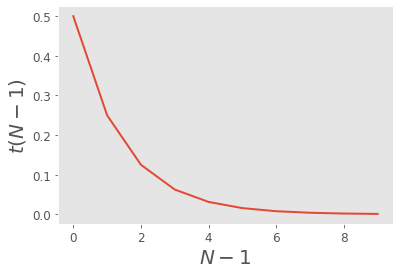

In [8]:
plt.plot(t(10))
plt.ylabel(r'$t(N-1)$',fontsize=20)
plt.xlabel(r'$N-1$',fontsize=20)

Now, let’s use the Markov Chain and see if we verify the same results.
<br>
We start from state $2$ and we verify after $N$ step the probability of being in state $2$. *The probability, in this case, is just the ratio between the number of $2$ in the final state and the number of occurrences*. To be consistent, the number of occurrences needs to tend to infinity. Let’s consider $1000$ tests.
<br>
This is the function we are going to use:

In [9]:
def prob(N):
    states = np.arange(1,6,1)
    steps = np.arange(1,N+1,1)
    n=1000
    state_collection = []
    for k in range(n):
        start = 2 
        for i in range(N):
            start = np.random.choice(states,p=trans_matrix[start-1])
        if start==2:
            state_collection.append(1)
        else:
            state_collection.append(0)
    state_collection = np.array(state_collection)
    return state_collection.sum()/n

Let’s use this function for various $N$ and call this `p(N)`:

In [10]:
def p(N):
    step = np.arange(1,N+1,1)
    y = []
    for s in step:
        v = prob(s)
        y.append(v)
    return y

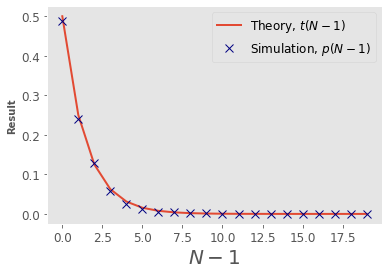

In [11]:
p_20 = p(20)
plt.plot(t(20),label=r'Theory, $t(N-1)$')
plt.plot(p_20,'x',label=r'Simulation, $p(N-1)$',color='navy')
plt.ylabel(r'Result',fontsize=10)
plt.xlabel(r'$N-1$',fontsize=20)
plt.legend()

As it is possible to see, we have used the transition matrix to do this simulation. **We can use the transition matrix to evaluate all the properties of the Markov Chain we are considering**.

## **Case 4: Weather Forecasting**

![Weather Forecast](https://www.upgrad.com/blog/wp-content/uploads/2020/03/1_udOn3pR6SqrKU37KujfdPg.png)

In the graphical representation shown above, say the _current observed state_ of the random variable is $sunny$. The probability of the random variable taking the value $sunny$ at the next time instance is $0.8$. It can also take the value $snowy$ with a probability of $0.01$, or $rainy$ with a probability of $0.19$. An important thing to note here is that the probability values existing in a state will always sum up to $1$.

In [31]:
class MarkovChain(object):
  def __init__(self, trans_matrix, states):
    """ initialize the MarkovChain class
        parameter: trans_matrix: 2-D array
                                 an array representing the probabilities
                                 of change of state in the system
                   states: 1-D array
                           an array representing the states of the system,
                           it needs to be in the same order as trans_matrix """
    self.trans_matrix = np.atleast_2d(trans_matrix)
    self.states = states
    self.index_dict = {self.states[index] : index for index in range(len(self.states))}
    self.state_dict = {index : self.states[index] for index in range(len(self.states))}
  
  def next_state(self, current_state):
    """ returns the state of the random variable at the next time instance
        parameter: current_state: str
                                  the state of the system """
    return np.random.choice(
        self.states,
        p = self.trans_matrix[self.index_dict[current_state], :]
    )

  def generate_state(self, current_state, no_of_future=10):
    """ generates the next states of the system
        parameter: current_state: str
                                  the state of the current random variable
                   no_of_future: int
                                 the number of future states to generate """
    future_states = []
    for i in range(no_of_future):
      next = self.next_state(current_state)
      future_states.append(next)
      current_state = next
    
    return future_states

Having defined the `MarkovChain` class, let us try coding the weather prediction

In [32]:
markov_matrix = [
    [0.8, 0.19, 0.01],
    [0.2, 0.7, 0.1],
    [0.1, 0.2, 0.7]
]

states_list = ['Sunny', 'Rainy', 'Snowy']

In [33]:
wheater_forecast = MarkovChain(markov_matrix, states_list)

In [34]:
wheater_forecast.next_state(current_state='Sunny')

'Rainy'

In [35]:
wheater_forecast.next_state(current_state='Rainy')

'Rainy'

In [36]:
wheater_forecast.next_state(current_state='Snowy')

'Snowy'

In [37]:
wheater_forecast.generate_state(current_state='Snowy', no_of_future=10)

['Snowy',
 'Snowy',
 'Snowy',
 'Snowy',
 'Snowy',
 'Snowy',
 'Snowy',
 'Rainy',
 'Rainy',
 'Sunny']